In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
from torch import Tensor
import numpy as np
from typing import Final, List
import matplotlib.pyplot as plt
from abc import abstractmethod
from utils import *

In [3]:
def error_of_tensor() -> None:
    '''
    Test Only! Do not use it when visualizing the tensor.
    '''
    coordinates : List[List[int]] = np.random.randint(500, size=(2, 2))
    coordinates2 : List[List[int]] = np.random.randint(500, size=(2, 3))
    try:
        t = Tensor([coordinates, coordinates2])
    except Exception as e:
        print(e)

In [4]:
def generate_random_tensor(size : int):
    '''
    Test Only! Do not use it when visualizing the tensor.
    '''
    if size <= 0:
        raise ArithmeticError("Size must be larger than 0!")
    data = []
    for i in range(size):
        temp : float = np.random.uniform(0.0, 1.0)
        t2 : float = 1.0 - temp
        data.append([temp, t2])
    return Tensor(data)

In [5]:
def generate_random_tensor2(size : int):
    '''
    Test Only! Do not use it when visualizing the tensor.
    '''
    if size <= 0:
        raise ArithmeticError("Size must be larger than 0!")
    data = []
    for i in range(size):
        temp : float = np.random.uniform(0.0, 1.0)
        t2 : float = np.random.uniform(0.0, 1.0 - temp)
        t3 : float = 1.0 - temp - t2
        data.append([temp, t2, t3])
    return Tensor(data)

In [6]:
def generate_random_tensor3(timestamp_size : int, player_num1 : int, player_num2):
    '''
    Test Only! Do not use it when visualizing the tensor.
    '''
    if timestamp_size < 50:
        raise ArithmeticError("TimeStamp size must be at least 50!")
    if player_num1 < 4 or player_num2 < 4:
        raise ArithmeticError("Number of player must be at least 4!")
    for i in range(timestamp_size):
        coordinates : List[List[int]] = np.random.randint(500, size=(2, player_num1))
        coordinates2 : List[List[int]] = np.random.randint(500, size=(2, player_num2))
        yield (Tensor(coordinates), Tensor(coordinates2))

In [7]:
class VisualizationHelper:

    WIDTH_BIAS : Final[int] = 1
    
    def __init__(self, t):
        self._tensor = t

    @abstractmethod
    def plot_height(self) -> int:
        raise NotImplementedError("This method is abstract!")
        
    @abstractmethod
    def plot_width(self, size : int) -> int:
        raise NotImplementedError("This method is abstract!")

    @abstractmethod
    def visualize_tensor(self, t : int) -> None:
        raise NotImplementedError("This method is abstract!")

    @property
    def tensor(self):
        return self._tensor
    
    @property
    def time(self) -> int:
        return self._time

In [8]:
class WinRateVHelper(VisualizationHelper):
    
    HEIGHT : Final[int] = 8
    MIN_WIDTH : Final[int] = 4
    WIDTH_DIVISOR : Final[int] = 6
    
    def __init__(self, t : Tensor):
        super().__init__(t)
        self._time = t.size()[0]
        
    def plot_height(self) -> int:
        return self.HEIGHT

    def plot_width(self) -> int:
        return max(self.MIN_WIDTH, self.time // self.WIDTH_DIVISOR + self.WIDTH_BIAS)
     
    def visualize_tensor(self, t : int = 0) -> None:
        timestamp_size : int = self.tensor.size()[0]
        plt.figure(1, figsize=(self.plot_width(), self.plot_height()))
        plt.xticks(list(range(0,timestamp_size + 1, 10)))
        plt.yticks(list(np.arange(0.0, 1.1, 0.1)))
        plt.plot(self.tensor)

In [9]:
class PlayerPositionVHelper(VisualizationHelper):
    
    MIN_WIDTH : Final[int] = 10
    MIN_HEIGHT : Final[int] = 10
    HEIGHT_DIVISOR : Final[int] = 52
    WIDTH_DIVISOR : Final[int] = 52
    
    def __init__(self, t, width : int, height : int):
        super().__init__(t)
        self._time = len(self.tensor)
        self._width = width
        self._height = height
        
    def plot_height(self) -> int:
        return max(self.MIN_HEIGHT, self.height // self.HEIGHT_DIVISOR + self.WIDTH_BIAS)
    
    def plot_width(self) -> int:
        return max(self.MIN_WIDTH, self.width // self.WIDTH_DIVISOR + self.WIDTH_BIAS)

    def visualize_tensor(self, t : int, show_pre : bool = False) -> None:
        if t < 0 or t >= self.time:
            raise ArithmeticError("@params time is out of bound!")
        plt.figure(1, figsize=(self.plot_width(), self.plot_height()))
        plt.xticks(list(range(0,self.width + 1, 20)))
        plt.yticks(list(range(0,self.height + 1, 20)))
        data_time = self.tensor[t]
        groupA = data_time[0]
        groupB = data_time[1]
        if show_pre and t > 0:
            data_time_pre = self.tensor[t - 1]
            groupAp = data_time_pre[0]
            groupBp = data_time_pre[1]
            plt.scatter(groupAp[0], groupAp[1], c = "red", s = 60, alpha=0.4)
            plt.scatter(groupBp[0], groupBp[1], c = "blue", s = 60, alpha=0.4)
        plt.scatter(groupA[0], groupA[1], c ="red", s = 60)
        plt.scatter(groupB[0], groupB[1], c ="blue", s = 60)
    
    @property
    def width(self) -> int:
        return self._width
    
    @property
    def height(self) -> int:
        return self._height

In [10]:
if __name__ == "__main__":
    helper = WinRateVHelper(generate_random_tensor(100))
    helper2 = WinRateVHelper(generate_random_tensor2(100))
    helper3 = PlayerPositionVHelper(list(generate_random_tensor3(100, 12, 10)), 500, 500)

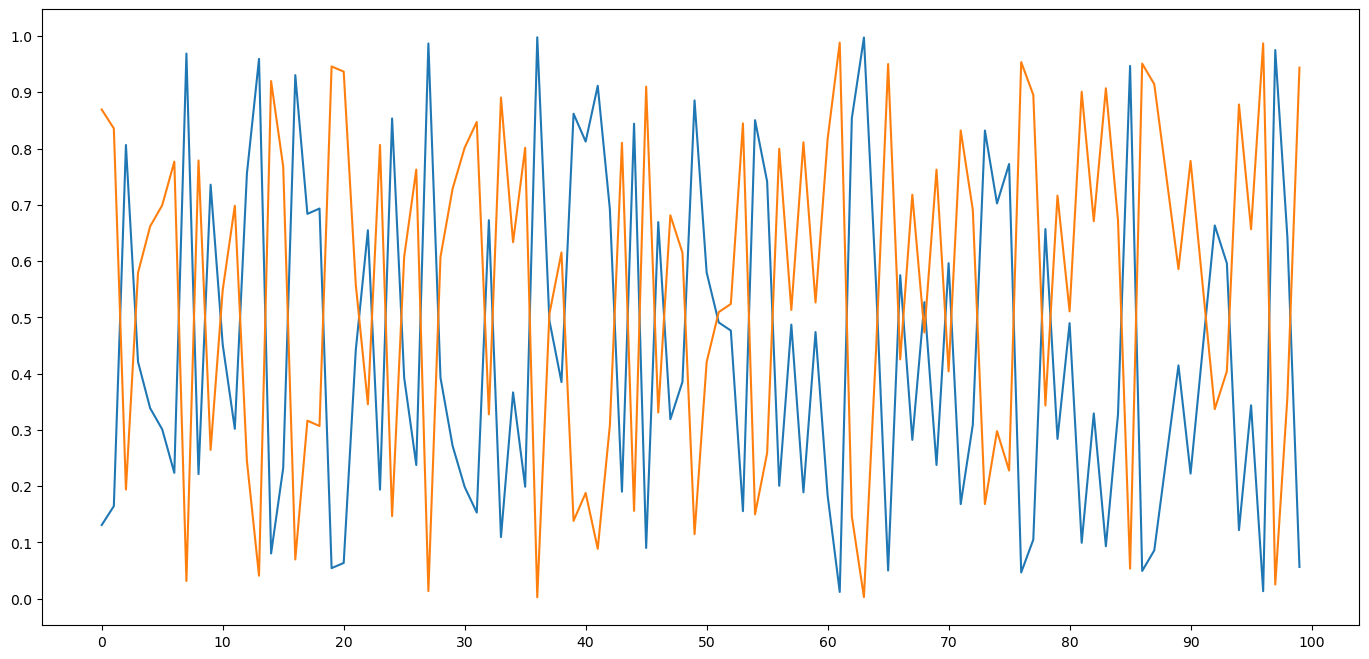

In [11]:
if __name__ == "__main__":
    helper.visualize_tensor()

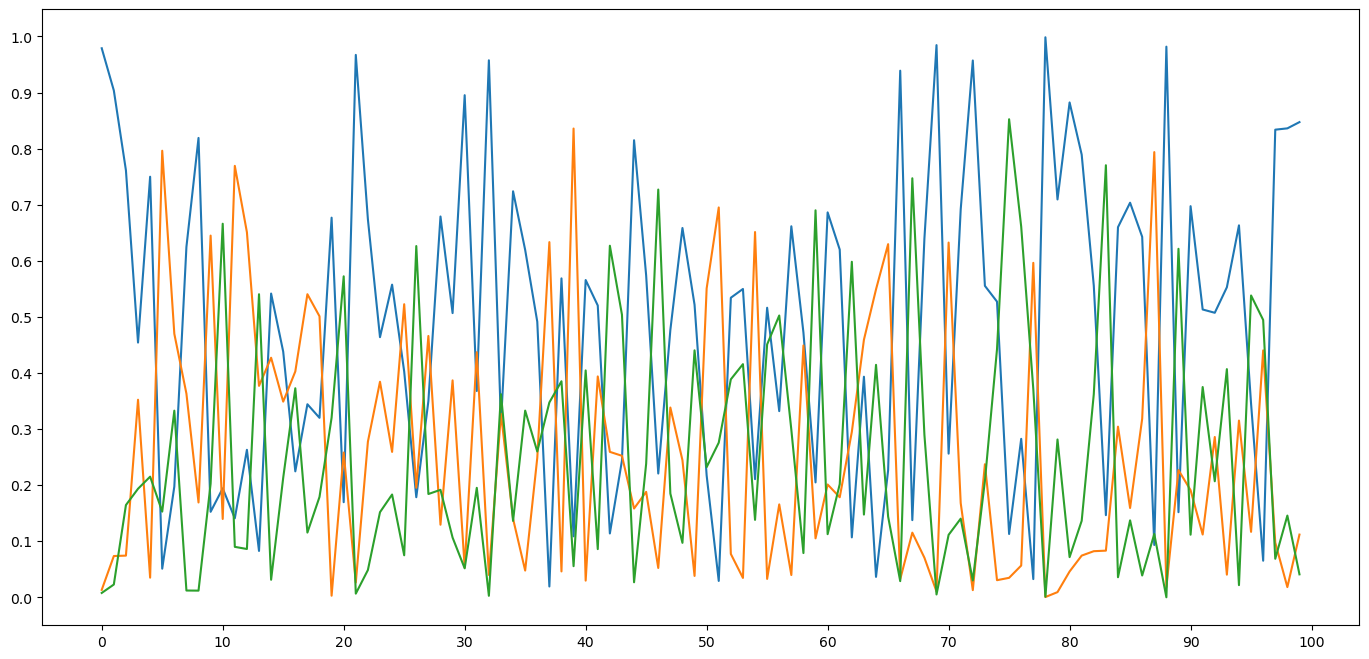

In [12]:
if __name__ == "__main__":
    helper2.visualize_tensor()

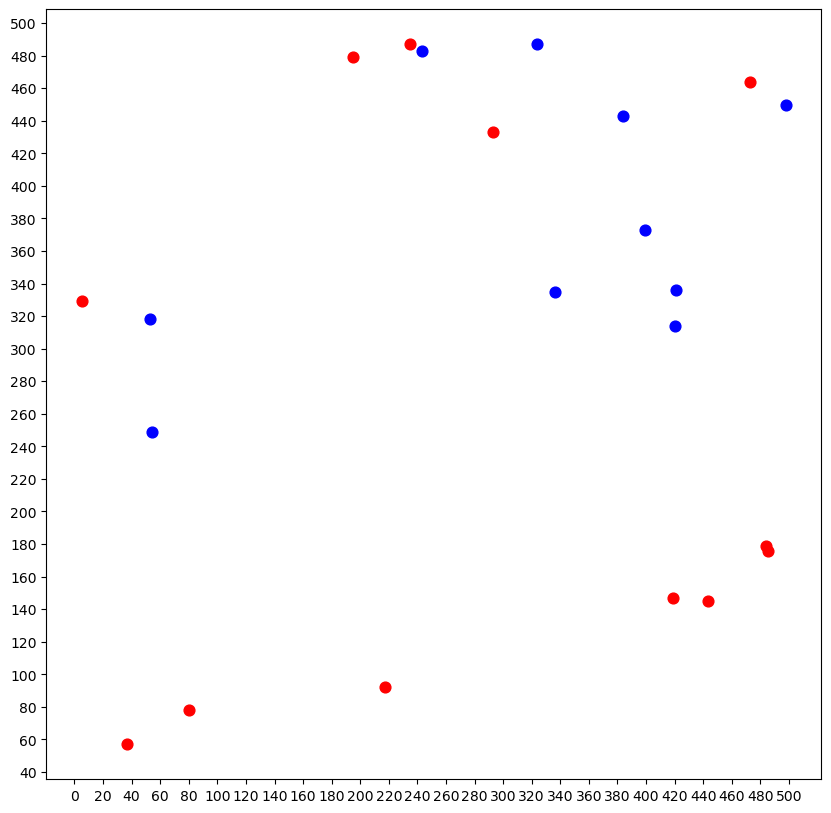

In [13]:
if __name__ == "__main__":
    helper3.visualize_tensor(0)

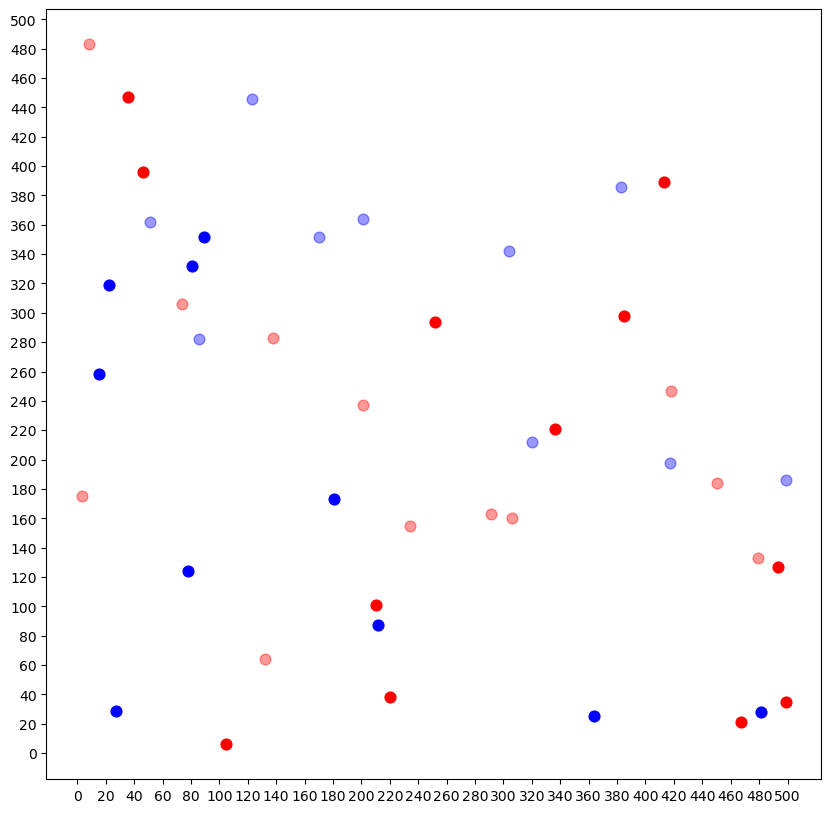

In [14]:
if __name__ == "__main__":
    helper3.visualize_tensor(50, True)

In [15]:
if __name__ == "__main__":
    error_of_tensor()

expected sequence of length 2 at dim 2 (got 3)


reading
loaded
Reading time:	 0.921363353729248
1


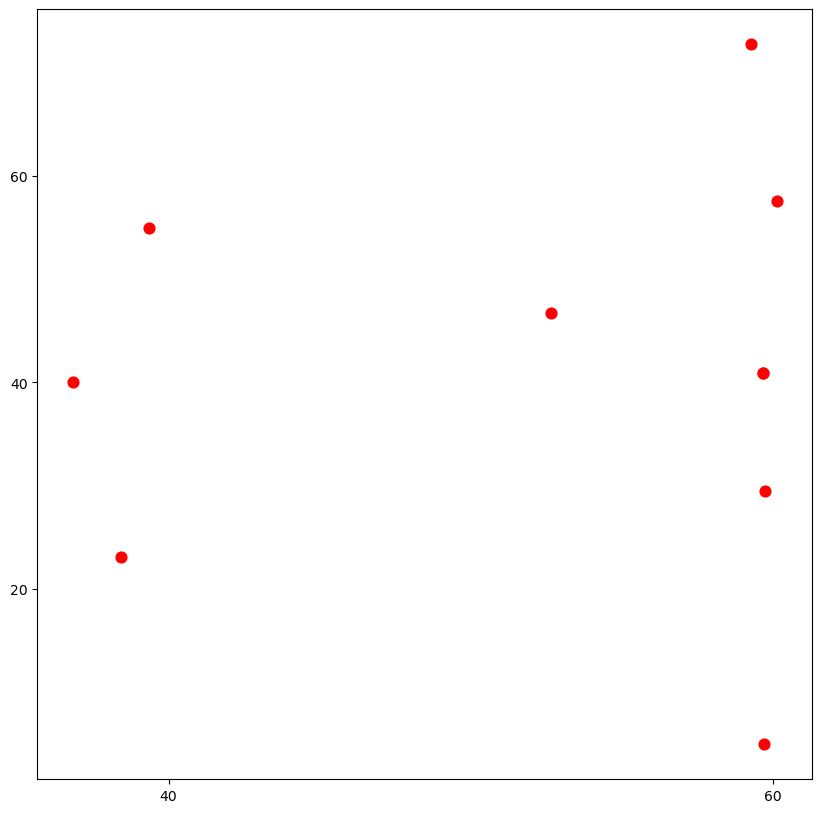

In [16]:
if __name__ == "__main__":
    data = load_data("sample_data.pkl")
    print(len(data))
    match_data = get_location_data(data, 0)
    helper4 = PlayerPositionVHelper(match_data, 100, 100)
    helper4.visualize_tensor(0, True)

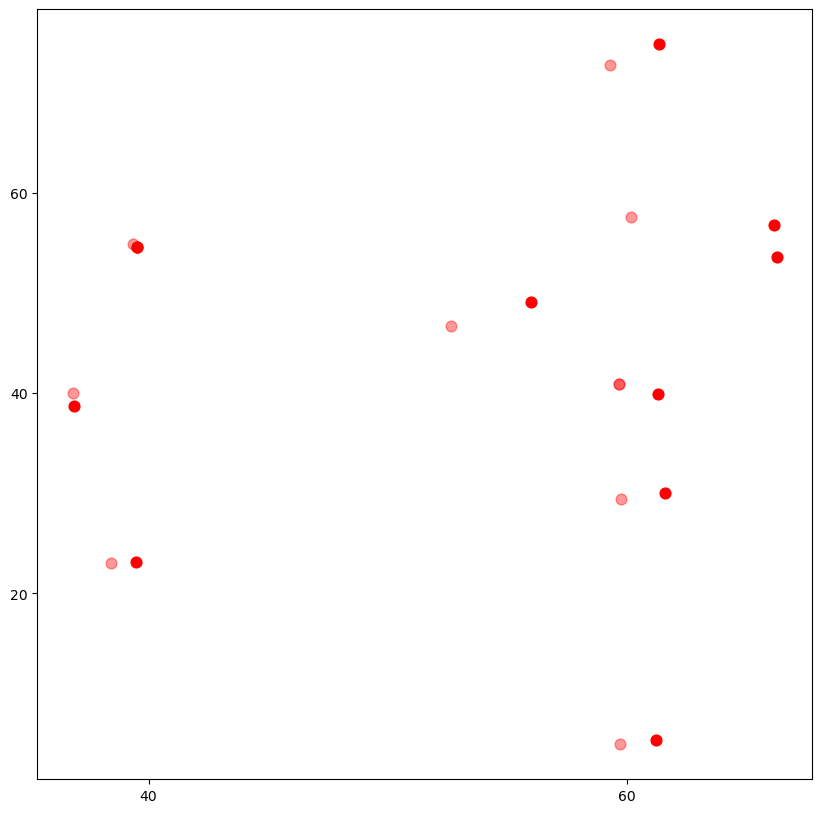

In [17]:
helper4.visualize_tensor(1, True)

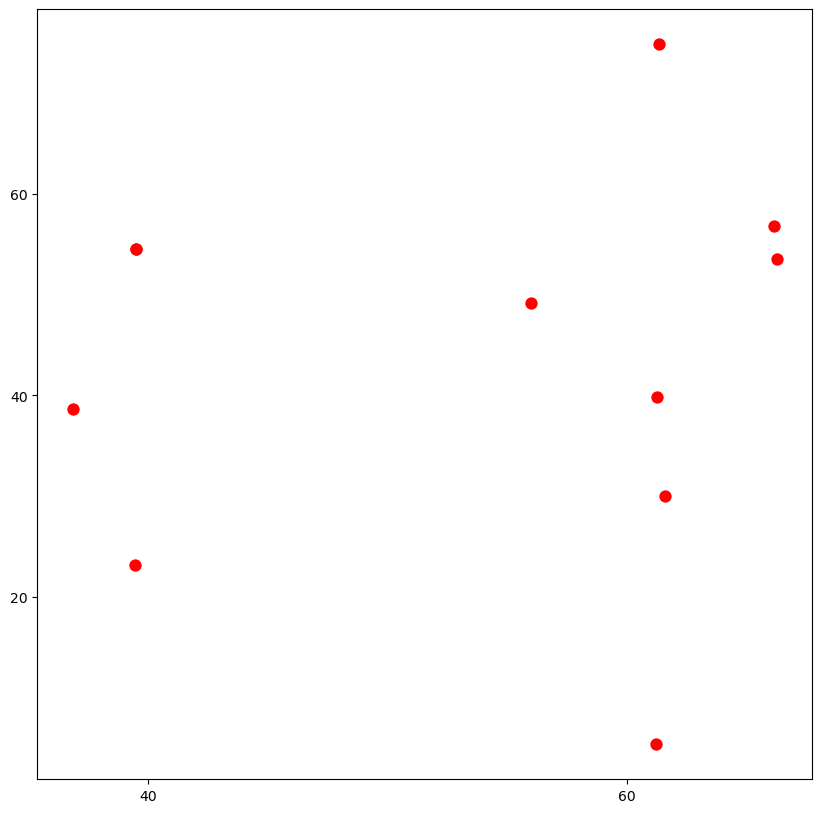

In [18]:
helper4.visualize_tensor(2, True)

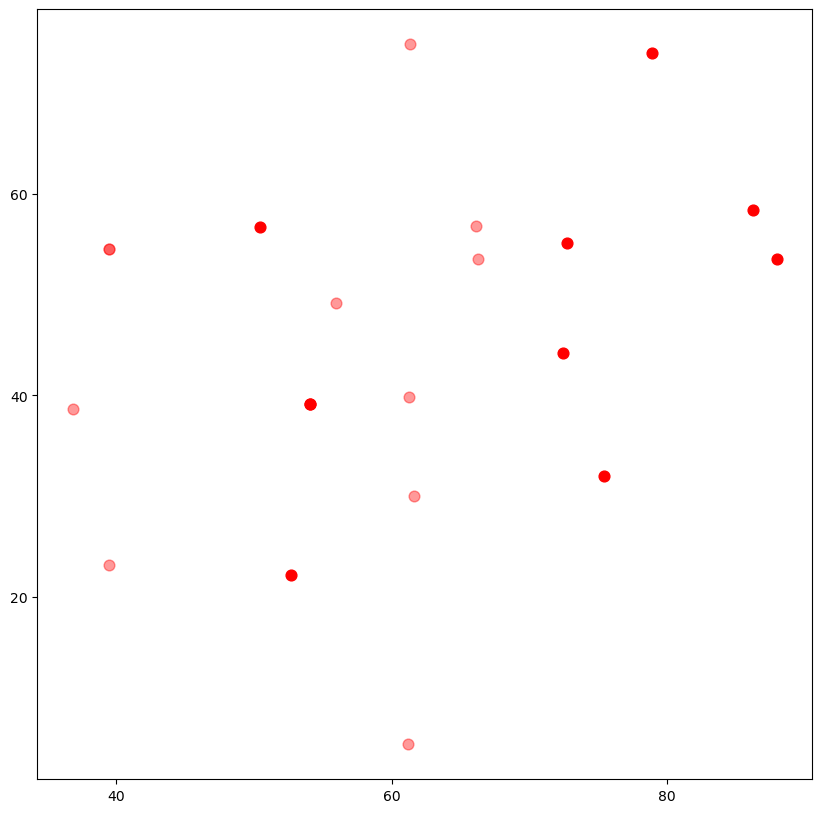

In [19]:
helper4.visualize_tensor(3, True)

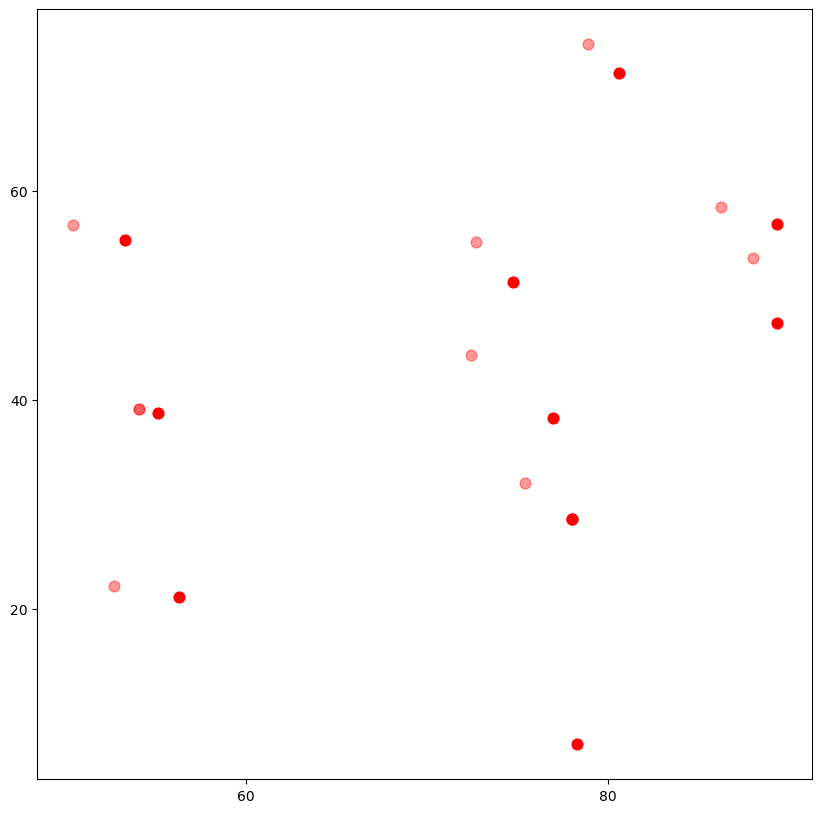

In [20]:
helper4.visualize_tensor(4, True)

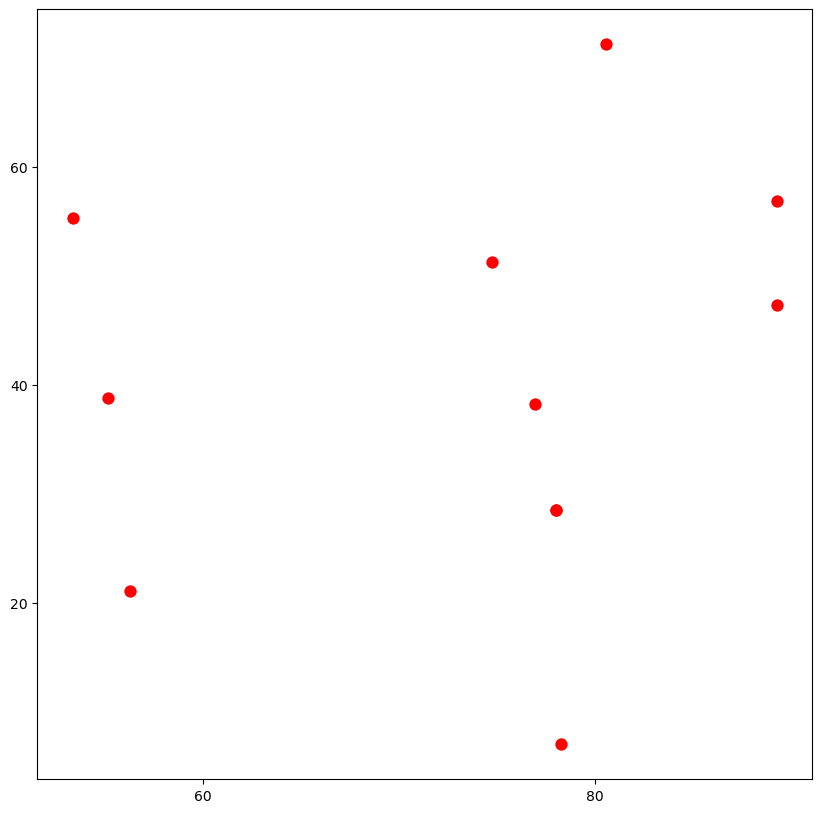

In [21]:
helper4.visualize_tensor(5, True)

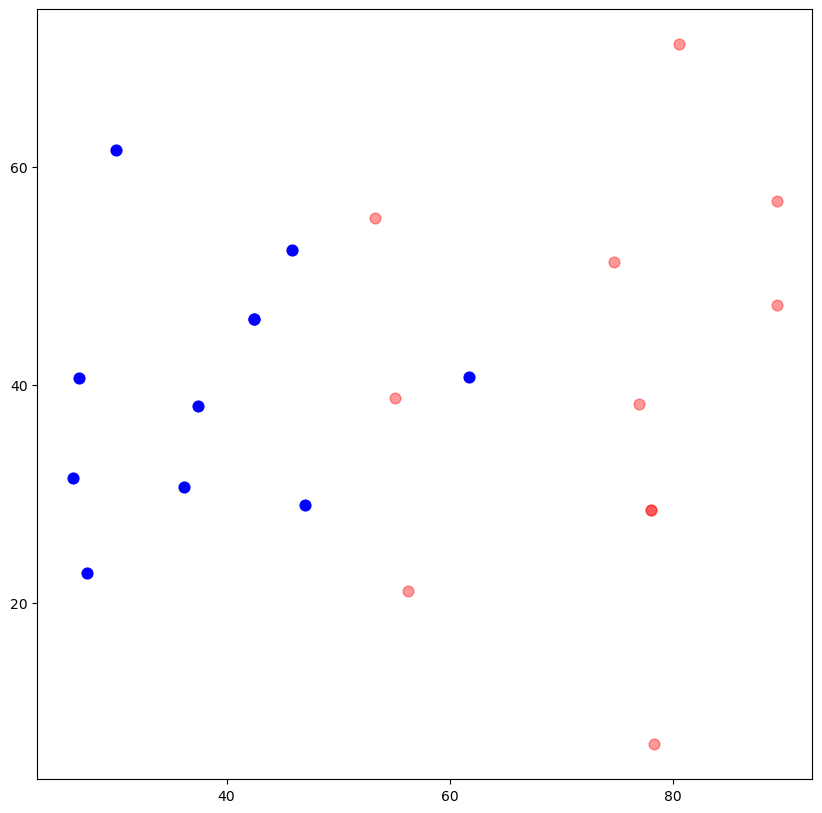

In [22]:
helper4.visualize_tensor(6, True)